In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# CARGA DE LOS DATASETS A UTILIZAR

Utilizamos dos datasets, uno que es el de pronostico, de como iban a salir los partidos del mundial, y el otro es de los partidos, de como salieron cada uno.\
Ambos archivos se encuentran en la carpeta de assets/archivos

- Pronostico: wc_forecasts.csv
- Partidos: wc_matches.csv

In [2]:
pronostico = pd.read_csv('../assets/archivos/wc_forecasts.csv')
partidos = pd.read_csv('../assets/archivos/wc_matches.csv')

## LIMPIEZA DE LOS DATA SETS

In [3]:
pronostico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   forecast_timestamp  256 non-null    object 
 1   team                256 non-null    object 
 2   group               256 non-null    object 
 3   spi                 256 non-null    float64
 4   global_o            256 non-null    float64
 5   global_d            256 non-null    float64
 6   sim_wins            256 non-null    float64
 7   sim_ties            256 non-null    float64
 8   sim_losses          256 non-null    float64
 9   sim_goal_diff       256 non-null    float64
 10  goals_scored        256 non-null    float64
 11  goals_against       256 non-null    float64
 12  group_1             256 non-null    float64
 13  group_2             256 non-null    float64
 14  group_3             256 non-null    float64
 15  group_4             256 non-null    float64
 16  make_rou

El archivo de los pronostico, contiene 256 filas y 22 columnas, que no presentan valores nulos.\
forecast_timestamp, team, group y timestamp son variables cualitativas.

spi, global_o, global_d, goals_scored, goals_against, 
make_round_of_16, make_quarters, make_semis, make_final, win_league son variables Cuantitativas Continuas. 

sim_wins, sim_ties, sim_losses, sim_goal_diff, group_1, group_2, group_3, group_4 son variables Cuantitativas Discretas

In [4]:
partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         64 non-null     object 
 1   league_id    64 non-null     int64  
 2   league       64 non-null     object 
 3   team1        64 non-null     object 
 4   team2        64 non-null     object 
 5   spi1         64 non-null     float64
 6   spi2         64 non-null     float64
 7   prob1        64 non-null     float64
 8   prob2        64 non-null     float64
 9   probtie      64 non-null     float64
 10  proj_score1  64 non-null     float64
 11  proj_score2  64 non-null     float64
 12  score1       64 non-null     int64  
 13  score2       64 non-null     int64  
 14  xg1          64 non-null     float64
 15  xg2          64 non-null     float64
 16  nsxg1        64 non-null     float64
 17  nsxg2        64 non-null     float64
 18  adj_score1   64 non-null     float64
 19  adj_score2

El archivo de los partidos, contiene un total de 64 filas, donde se no contiene ninguno nulo, con 20 columnas

Tambien se puede observar que la columna date, esta como 'object', cuando deberia de ser date o datetime.

### TRADUCCIONES DE LAS COLUMNAS

In [5]:
# Reemplazamos el nombre de las columnas por su traducción a Español para facilitar la lectura
pronostico.rename(columns={
    'forecast_timestamp': 'Fase',
    'team': 'Equipo',
    'group': 'Grupo',
    'spi': 'SPI',
    'global_o': 'Global_Ofensivo',
    'global_d': 'Global_Defensivo',
    'sim_wins': 'Simulaciones_Ganadas',
    'sim_ties': 'Simulaciones_Empatadas',
    'sim_losses': 'Simulaciones_Perdidas',
    'sim_goal_diff': 'Diferencia_Goles_Simulados',
    'goals_scored': 'Goles_Anotados',
    'goals_against': 'Goles_Recibidos',
    'group_1': 'Grupo_1',
    'group_2': 'Grupo_2',
    'group_3': 'Grupo_3',
    'group_4': 'Grupo_4',
    'make_round_of_16': 'Clasificar_a_Octavos',
    'make_quarters': 'Clasificar_a_Cuartos',
    'make_semis': 'Clasificar_a_Semifinales',
    'make_final': 'Clasificar_a_Final',
    'win_league': 'Ganar_Liga',
    'timestamp': 'Fecha'
}, inplace=True)

traducciones = {
    'date': 'fecha',
    'league_id': 'id_liga',
    'league': 'liga',
    'team1': 'equipo1',
    'team2': 'equipo2',
    'spi1': 'spi_equipo1',
    'spi2': 'spi_equipo2',
    'prob1': 'prob_equipo1',
    'prob2': 'prob_equipo2',
    'probtie': 'prob_empate',
    'proj_score1': 'puntaje_proy1',
    'proj_score2': 'puntaje_proy2',
    'score1': 'puntaje1',
    'score2': 'puntaje2',
    'xg1': 'goles_esperados1',
    'xg2': 'goles_esperados2',
    'nsxg1': 'ns_goles_esperados1',
    'nsxg2': 'ns_goles_esperados2',
    'adj_score1': 'puntaje_ajustado1',
    'adj_score2': 'puntaje_ajustado2'
}

partidos.rename(columns=traducciones,inplace= True)
# Redondeamos los valores de las columnas especificadas a decimales
partidos[['puntaje_proy1', 'puntaje_proy2', 'ns_goles_esperados1', 'ns_goles_esperados2']] = partidos[['puntaje_proy1', 'puntaje_proy2', 'ns_goles_esperados1', 'ns_goles_esperados2']].round(1)

### AJUSTAMOS LOS VALORES DE FECHA Y FASE EN EL DATASET

In [6]:
# Reemplazamos los valores de forecast_timestamp para que representen las fases de cada partido y no las fechas
pronostico['Fecha'] = pronostico['Fase']
pronostico['Fase'] = pronostico['Fase'].replace({
    '2022-12-18 17:56:03 UTC': 'Post Final',
    '2022-12-17 16:54:45 UTC': 'Pre Final',
    '2022-12-10 21:01:29 UTC': 'Pre Semis',
    '2022-12-06 20:54:12 UTC': 'Pre Cuartos',
    '2022-12-02 21:01:10 UTC': 'Pre Octavos',
    '2022-11-28 20:59:50 UTC': 'Pre 3er partido',
    '2022-11-24 20:56:17 UTC': 'Pre 2do partido',
    '2022-11-16 16:00:55 UTC': 'Pre Inicio Copa',
})

pronostico[pronostico['Equipo'] == 'Argentina'].groupby('Fase').head()

,Fase,Equipo,Grupo,SPI,Global_Ofensivo,Global_Defensivo,Simulaciones_Ganadas,Simulaciones_Empatadas,Simulaciones_Perdidas,Diferencia_Goles_Simulados,...,Grupo_1,Grupo_2,Grupo_3,Grupo_4,Clasificar_a_Octavos,Clasificar_a_Cuartos,Clasificar_a_Semifinales,Clasificar_a_Final,Ganar_Liga,Fecha
0,Post Final,Argentina,C,89.64860,2.83610,0.39397,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,2022-12-18 17:56:03 UTC
32,Pre Final,Argentina,C,88.85631,2.69895,0.37464,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.53027,2022-12-17 16:54:45 UTC
64,Pre Semis,Argentina,C,87.45777,2.58007,0.39356,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.64042,0.36568,2022-12-10 21:01:29 UTC
99,Pre Cuartos,Argentina,C,87.32471,2.57620,0.39880,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.57583,0.24429,0.13042,2022-12-06 20:54:12 UTC
130,Pre Octavos,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,0.82673,0.51560,0.24966,0.13119,2022-12-02 21:01:10 UTC
164,Pre 3er partido,Argentina,C,86.02625,2.48839,0.42171,1.57821,0.26472,1.15707,1.89454,...,0.57290,0.20115,0.22498,0.00097,0.77405,0.49381,0.29805,0.12681,0.06528,2022-11-28 20:59:50 UTC
198,Pre 2do partido,Argentina,C,86.09354,2.57779,0.46600,1.08527,0.55644,1.35829,0.54682,...,0.23508,0.30558,0.22864,0.23070,0.54066,0.31108,0.18949,0.09295,0.04724,2022-11-24 20:56:17 UTC
227,Pre Inicio Copa,Argentina,C,87.20776,2.62755,0.43170,1.83671,0.73199,0.43130,3.16936,...,0.59722,0.24273,0.11295,0.04710,0.83995,0.53091,0.32755,0.15944,0.08476,2022-11-16 16:00:55 UTC


### CONVERTIMOS LAS COLUMNAS CORRESPONDIENTES A SU RESPECTIVO VALOR

In [7]:
#Tranformamos la columna Marca_Tiempo, como date
pronostico['Fecha'] = pd.to_datetime(pronostico['Fecha'])
pronostico['Fecha'] = pronostico['Fecha'].dt.date
pronostico['Fecha'] = pd.to_datetime(pronostico['Fecha'])

partidos['fecha'] = pd.to_datetime(partidos['fecha'])

### ELIMINAMOS LOS EQUIPOS QUE QUEDARON FUERA DEL TORNEO EN LAS DISTINTAS FASES

In [8]:
#Eliminamos los equipos que perdieron antes de los 8vos de final, de los 4tos de final y la Semi Final
pronostico = pronostico.loc[(pronostico['Clasificar_a_Octavos'] != 0) & (pronostico['Clasificar_a_Cuartos'] != 0) & (pronostico['Clasificar_a_Semifinales'] != 0)]
pronostico.head()

,Fase,Equipo,Grupo,SPI,Global_Ofensivo,Global_Defensivo,Simulaciones_Ganadas,Simulaciones_Empatadas,Simulaciones_Perdidas,Diferencia_Goles_Simulados,...,Grupo_1,Grupo_2,Grupo_3,Grupo_4,Clasificar_a_Octavos,Clasificar_a_Cuartos,Clasificar_a_Semifinales,Clasificar_a_Final,Ganar_Liga,Fecha
0,Post Final,Argentina,C,89.64860,2.83610,0.39397,2.0,0.0,1.0,3.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.00000,2022-12-18
1,Post Final,France,D,88.30043,2.96765,0.54381,2.0,0.0,1.0,3.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.00000,2022-12-18
2,Post Final,Morocco,F,73.16416,1.74313,0.53433,2.0,1.0,0.0,3.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.00000,2022-12-18
3,Post Final,Croatia,F,78.82038,2.20264,0.60290,1.0,2.0,0.0,3.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.00000,2022-12-18
32,Pre Final,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,3.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.53027,2022-12-17


### Esta función agrega una nueva columna 'fase' al dataframe 'partido', la cual detecta en que fase se encuentra cada partido comparando la fecha del primer y ultimo partido de cada fase. 
- Esto nos ayudará a la hora de graficar los datos

In [9]:
def determinar_fase(fecha):
    """
    Esta función crea una columna fase en el dataframe partidos, en la cual se determina se determinan sus valores basados en la fecha.

    """
    if fecha >= pd.Timestamp('2022-11-16') and fecha <= pd.Timestamp('2022-11-24'):
        return "Primer partido"
    elif fecha >= pd.Timestamp('2022-11-25') and fecha <= pd.Timestamp('2022-11-28'):
        return "Segundo partido"
    elif fecha >= pd.Timestamp('2022-11-29') and fecha <= pd.Timestamp('2022-12-02'):
        return "Tercer partido"
    elif fecha >= pd.Timestamp('2022-12-03') and fecha <= pd.Timestamp('2022-12-06'):
        return "Octavos de Final"
    elif fecha >= pd.Timestamp('2022-12-07') and fecha <= pd.Timestamp('2022-12-10'):
        return "Cuartos de Final"
    elif fecha >= pd.Timestamp('2022-12-11') and fecha <= pd.Timestamp('2022-12-14'):
        return "Semifinal"
    elif fecha == pd.Timestamp('2022-12-17'):
        return "3er/4to Puesto"
    elif fecha == pd.Timestamp('2022-12-18'):
        return "Final"
    else:
        return None

partidos['fase'] = partidos['fecha'].apply(determinar_fase)

In [10]:
# Creamos nuevas columnas 'score_predecido' y 'score_real' que sean la suma de los goles esperados de los dos equipos por cada partido
partidos['score_predecido'] = partidos['goles_esperados1'] + partidos['goles_esperados2']
partidos['score_real'] = partidos['puntaje1'] + partidos['puntaje2']

### Creamos un nuevo dataframe llamada 'sorpresas', que almacena las diferencia entre los goles predecidos y anotados en cada partido, para luego dividirlo en nuevos dataframes agrupados y agregando medidas para facilitar la visualizacion

In [11]:
sorpresas = [] # Creamos una lista para luego convertir en DataFrame

for _, row in partidos.iterrows():        # Iteramos sobre cada partido
    resultado_actual = row['score_real'] - row['score_predecido'] # Calculamos la diferencia entre goles reales y predecidos
    sorpresas.append({
        'fase': row['fase'],
        'sorpresa': resultado_actual,
        'partido': f"{row['equipo1']} {row['puntaje1']} vs {row['puntaje2']} {row['equipo2']}"
    })

# Filtramos las sorpresas para obtener solo el partido con mayor sorpresa de cada fase
sorpresas_df = pd.DataFrame(sorpresas)
mayor_sorpresa_por_fase = sorpresas_df.loc[sorpresas_df.groupby('fase')['sorpresa'].idxmax()]

# Calculamos la sorpresa media por fase
sorpresa_media_por_fase = sorpresas_df.groupby('fase')['sorpresa'].mean().reset_index()
sorpresa_media_por_fase.rename(columns={'sorpresa': 'sorpresa_media'}, inplace=True)

# Unimos los datos de mayor sorpresa con la sorpresa media cuando coinciden por fase en un nuevo dataframe
comparacion_sorpresas = pd.merge(mayor_sorpresa_por_fase, sorpresa_media_por_fase, on='fase')

### OBTENCIÓN LOS GOLES ESPERADOS VS LOS GOLES REALES

In [22]:
def comparacion_resultado(equipo: str,etapa: str,pronostico: pd.DataFrame, partido: pd.DataFrame) -> dict | str:
    """
    Compara el resultado pronosticado de un partido con el resultado real jugado.

    Args:
        equipo (str): Nombre del equipo para el cual se realizará la comparación.
        fecha (str): Fecha de cuando se jugo el partido
        etapa (str): Etapa del torneo o competencia (ej., "fase de grupos", "cuartos de final").
        pronostico (pd.DataFrame): DataFrame que contiene las predicciones para los partidos,
            con columnas relevantes para el pronóstico.
        partido (pd.DataFrame): DataFrame con los resultados reales de los partidos,
            que incluye la información de los equipos y el resultado final.
    Returns:
        dict: Un diccionario que contiene la comparación entre el pronóstico y el resultado real.
    """

    pronostico_equipo = pronostico[(pronostico['Equipo'] == equipo) & (pronostico['Fase'] == etapa)]
    if pronostico_equipo.empty:
        return f"No se encontró pronóstico para el equipo {equipo} en la etapa {etapa}."
    
    fecha = pronostico_equipo['Fecha'].iloc[0]

    if fecha not in [pd.Timestamp('2022-12-17'), pd.Timestamp('2022-12-18')]:
        fecha = fecha + np.timedelta64(1, 'D')
    else:
        fecha = fecha

    fase = determinar_fase(fecha)

    partido_real = partido[
        ((partido['equipo1'] == equipo) | (partido['equipo2'] == equipo)) &
        (partido['fase'] == fase)
        ]
    if partido_real.empty:
        return f"No se encontró partido jugado para el equipo {equipo}."

    goles_esperados = (partido_real[['goles_esperados1', 'goles_esperados2']].values[0] if partido_real['equipo1'].iloc[0] == equipo 
                    else partido_real[['goles_esperados1', 'goles_esperados1']].values[0])

    goles_reales = (partido_real[['puntaje1', 'puntaje2']].values[0] if partido_real['equipo1'].iloc[0] == equipo 
                    else partido_real[['puntaje2', 'puntaje1']].values[0])

    resultado_comparacion = {
        'Equipo': equipo,
        'Etapa': fase,
        'Goles_Anotados_Pronosticados': round(float(goles_esperados[0]),1),
        'Goles_Recibidos_Pronosticados': round(float(goles_esperados[1]),1),
        'Goles_Anotados_Reales': int(goles_reales[0]),
        'Goles_Recibidos_Reales': int(goles_reales[1])
    }

    return resultado_comparacion

In [23]:
equipo_interes = []
for equipo in ['Argentina','Brazil', 'Morocco', 'France']:
    for fase in pronostico['Fase'].unique():
        dic = comparacion_resultado(equipo, fase, pronostico, partidos)
        if type(dic) == dict:
            equipo_interes.append(dic)

equipo_sorpresa = pd.DataFrame(equipo_interes)
equipo_sorpresa

,Equipo,Etapa,Goles_Anotados_Pronosticados,Goles_Recibidos_Pronosticados,Goles_Anotados_Reales,Goles_Recibidos_Reales
0,Argentina,Final,2.8,2.2,3,3
1,Argentina,Semifinal,1.7,0.5,3,0
2,Argentina,Cuartos de Final,0.4,0.4,2,2
3,Argentina,Octavos de Final,1.3,0.3,2,1
4,Argentina,Tercer partido,0.2,0.2,2,0
5,Argentina,Segundo partido,0.3,0.2,2,0
6,Argentina,Primer partido,1.6,0.1,1,2
7,Brazil,Cuartos de Final,0.6,0.6,1,1
8,Brazil,Octavos de Final,3.0,0.7,4,1
9,Brazil,Tercer partido,0.4,0.4,0,1


In [ ]:
analisis = []

for equipo in pronostico['Equipo'].unique():
    for fase in pronostico['Fase'].unique():
        resultado = comparacion_resultado(equipo, fase, pronostico, partidos)
        if type(resultado) == dict:
            analisis.append(resultado)

analisis_df = pd.DataFrame(analisis)

analisis_df

## GRAFICOS

### Análisis del SPI (Soccer Power Index) de Argentina. Tomando en cuenta desde previo al inicio del torneo hasta después del encuentro final.

In [64]:
def grafico_lineplot(dataset : pd.DataFrame, tamanio_x : int, tamanio_y : int , columna_x : str, columna_y : str, hue : str, xlabel : str, ylabel : str, titulo : str):
    """
    Esta función crea un gráfico de línea a partir de un DataFrame.
    Args:
        dataset (pd.DataFrame): El DataFrame que contiene los datos a graficar.
        tamanio_x (int): El tamaño del gráfico en el eje X.
        tamanio_y (int): El tamaño del gráfico en el eje Y.
        columna_x (str): El nombre de la columna que se usará en el eje X.
        columna_y (str): El nombre de la columna que se usará en el eje Y.
        hue (str): El nombre de la columna que se usará para diferenciar las líneas en el gráfico.
        xlabel (str): La etiqueta del eje X.
        ylabel (str): La etiqueta del eje Y.
        titulo (str): El título del gráfico.
    """
    plt.figure(figsize=(tamanio_x, tamanio_y))
    sns.lineplot(data=dataset, x=columna_x, y=columna_y, hue= hue, marker='o', sort=False)

    plt.gca().invert_xaxis()

    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.grid(True)

    plt.show()

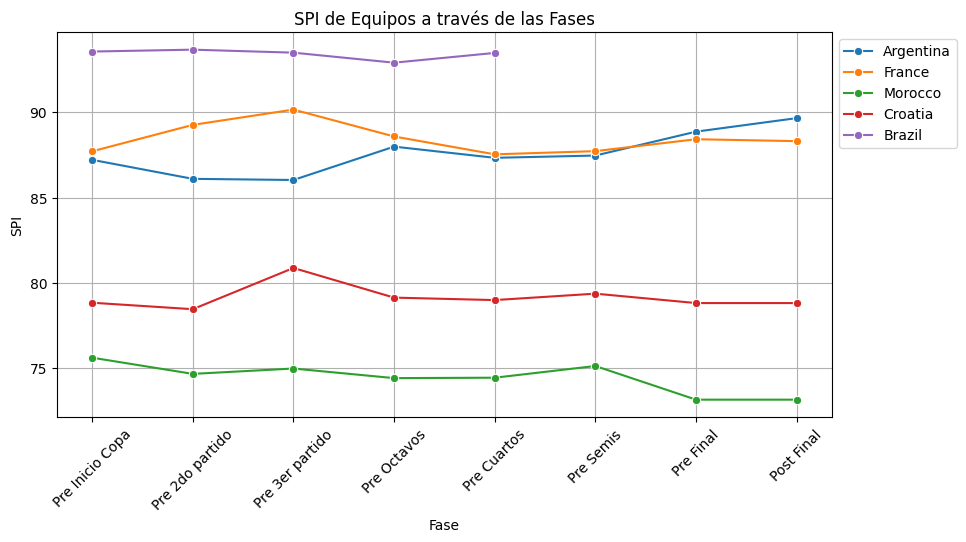

In [65]:
equipos_interes = ['Argentina', 'France', 'Brazil', 'Croatia', 'Morocco']
equipos_data = pronostico[pronostico['Equipo'].isin(equipos_interes)]

grafico_lineplot(equipos_data, 10, 5, 'Fase', 'SPI', 'Equipo', 'Fase', 'SPI', 'SPI de Equipos a través de las Fases')

### Grafico Global Ofensivo y Global Defensivo por cada fase, de las 5 mejores selecciones

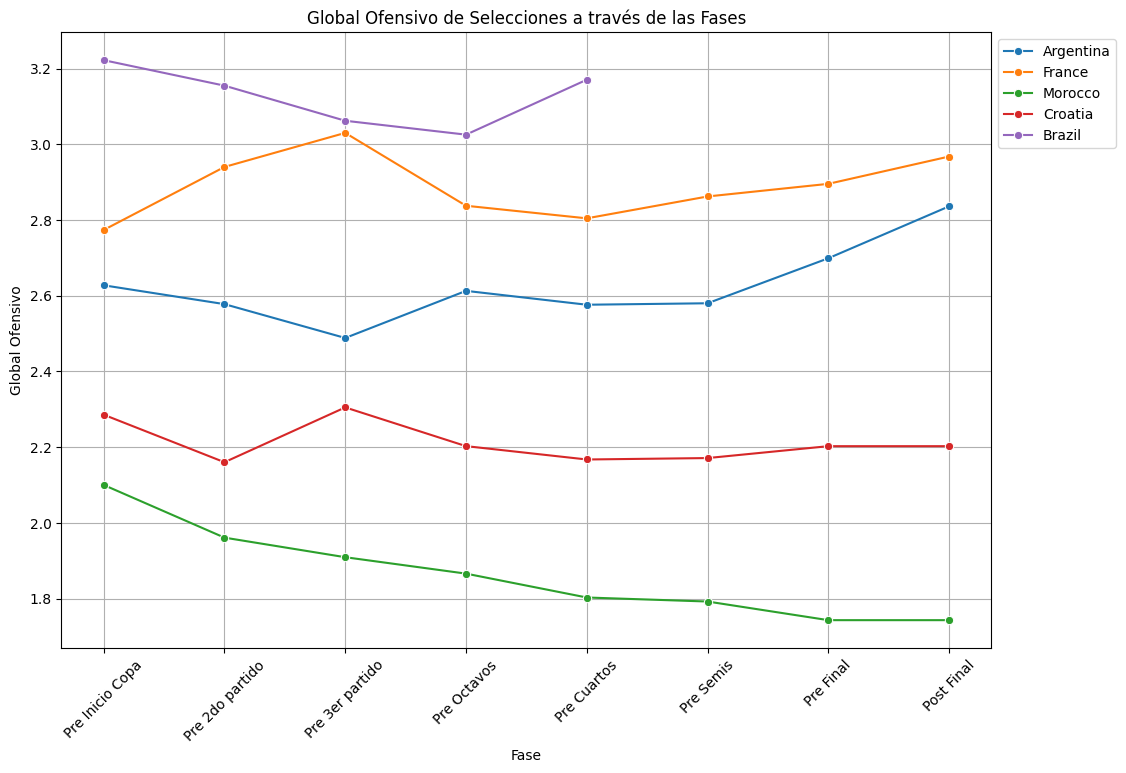

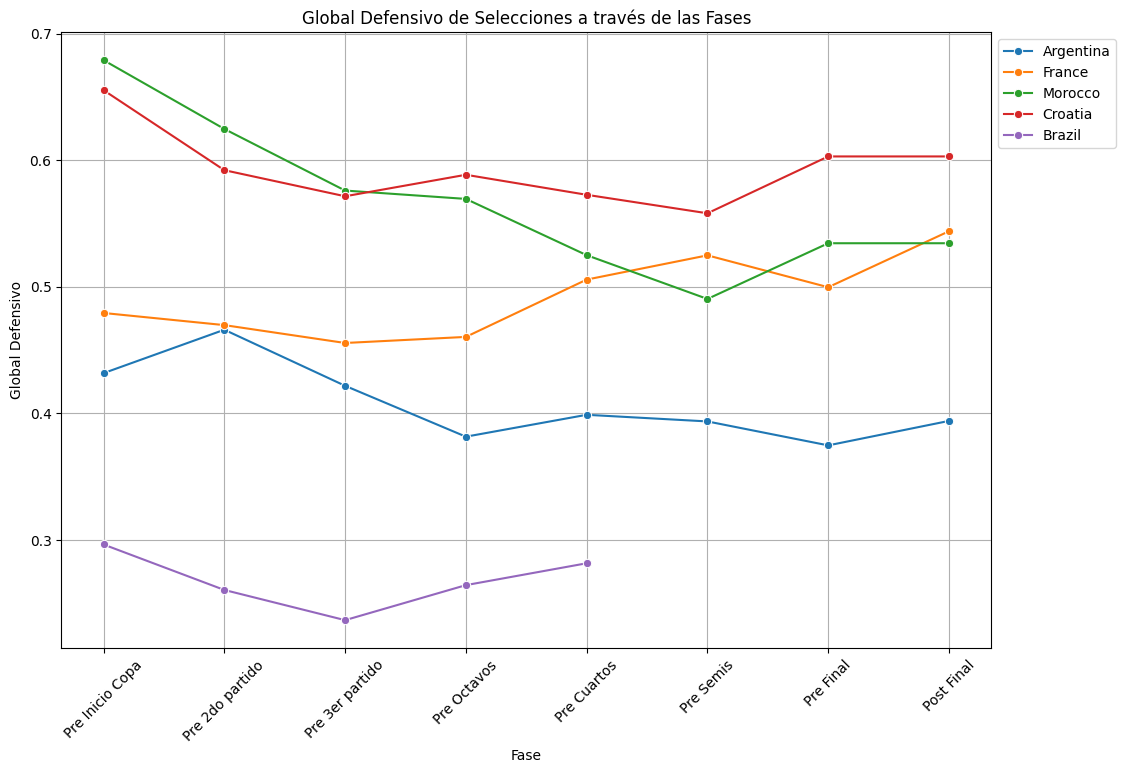

In [68]:
# Global Ofensivo grafico
grafico_lineplot(equipos_data, 12, 8, 'Fase', 'Global_Ofensivo', 'Equipo', 'Fase', 'Global Ofensivo', 'Global Ofensivo de Selecciones a través de las Fases')

# Global Defensivo grafico
grafico_lineplot(equipos_data, 12, 8, 'Fase', 'Global_Defensivo', 'Equipo', 'Fase', 'Global Defensivo', 'Global Defensivo de Selecciones a través de las Fases')


### GRAFICO DE COMPRACION DE GOLES ESPERADOS VS GOLES REALES

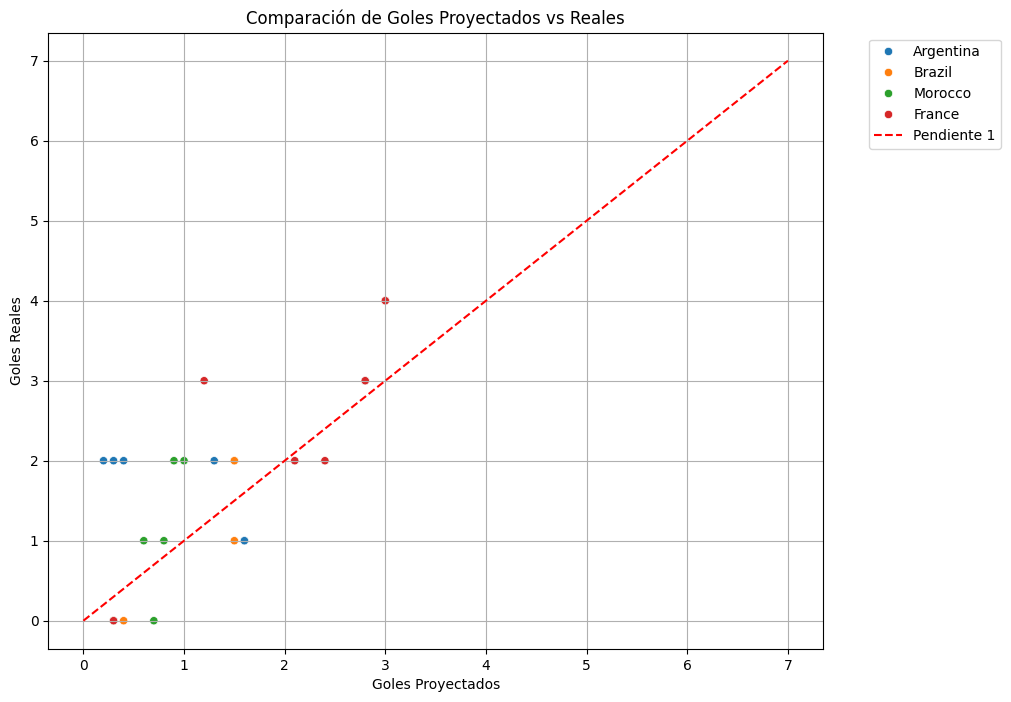

In [16]:
plt.figure(figsize=(10, 8))

# Scatter plot para el resultado predecido vs el resultado real
sns.scatterplot(data=equipo_sorpresa, x='Goles_Anotados_Pronosticados', y='Goles_Anotados_Reales', hue='Equipo')

# Agregar línea con pendiente de 1
plt.plot([0, 7], [0, 7], color='red', linestyle='--', label='Pendiente 1')

plt.title('Comparación de Goles Proyectados vs Reales'), plt.xlabel('Goles Proyectados'), plt.ylabel('Goles Reales'), plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left'), plt.grid(True)
plt.show();

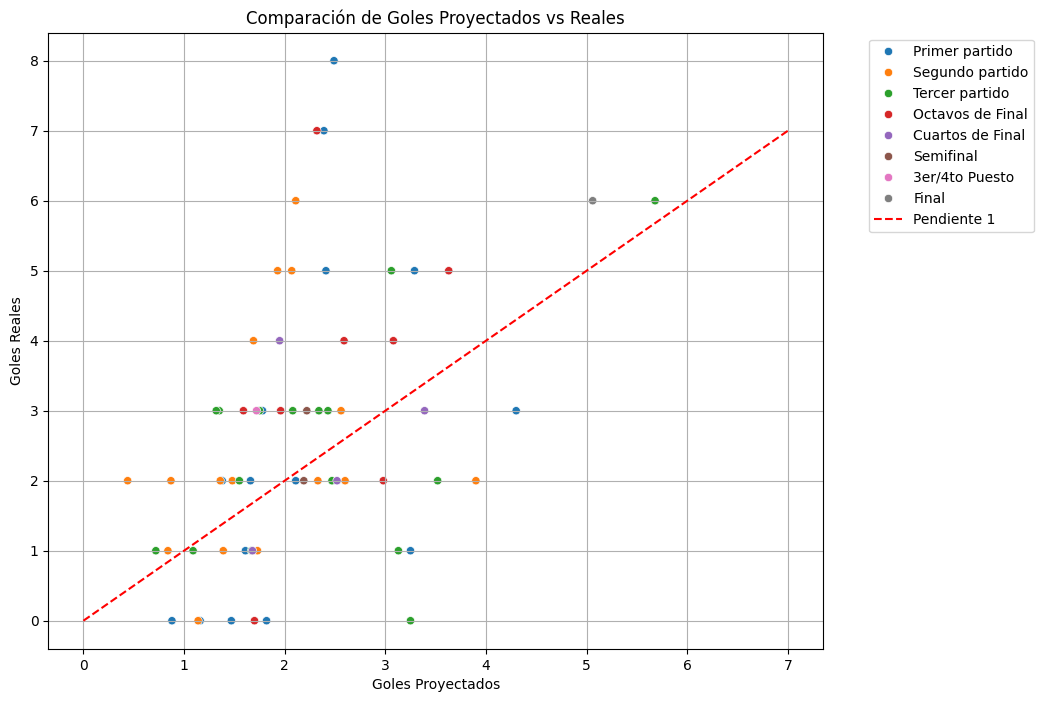

In [17]:
plt.figure(figsize=(10, 8))

# Scatter plot para el resultado predecido vs el resultado real
sns.scatterplot(data=partidos, x='score_predecido', y='score_real', hue='fase')

# Agregar línea con pendiente de 1
plt.plot([0, 7], [0, 7], color='red', linestyle='--', label='Pendiente 1')

plt.title('Comparación de Goles Proyectados vs Reales'), plt.xlabel('Goles Proyectados'), plt.ylabel('Goles Reales'), plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left'), plt.grid(True)
plt.show();

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------

### En este gráfico podemos observar los partidos con mayor diferencia entre goles reales y predecidos(La denominada 'sorpresa').
Podemos observar que la media de sorpresa en todas las fases es menor que 1, esto nos dice que:
- El modelo de predicción es muy acertado, ya que obviando estos outliers, los valores van desde -0,6 hasta 1,4 entre el segundo y tercer cuartil.
- Esto se comprueba ya que a medida que avanzan las etapas del torneo, al realizarse menos encuentros por fase, la posibilidad de que existan outliers disminuye.

Inicio del segundo cuartil (25%): -0.6
Fin del tercer cuartil (75%): 1.4


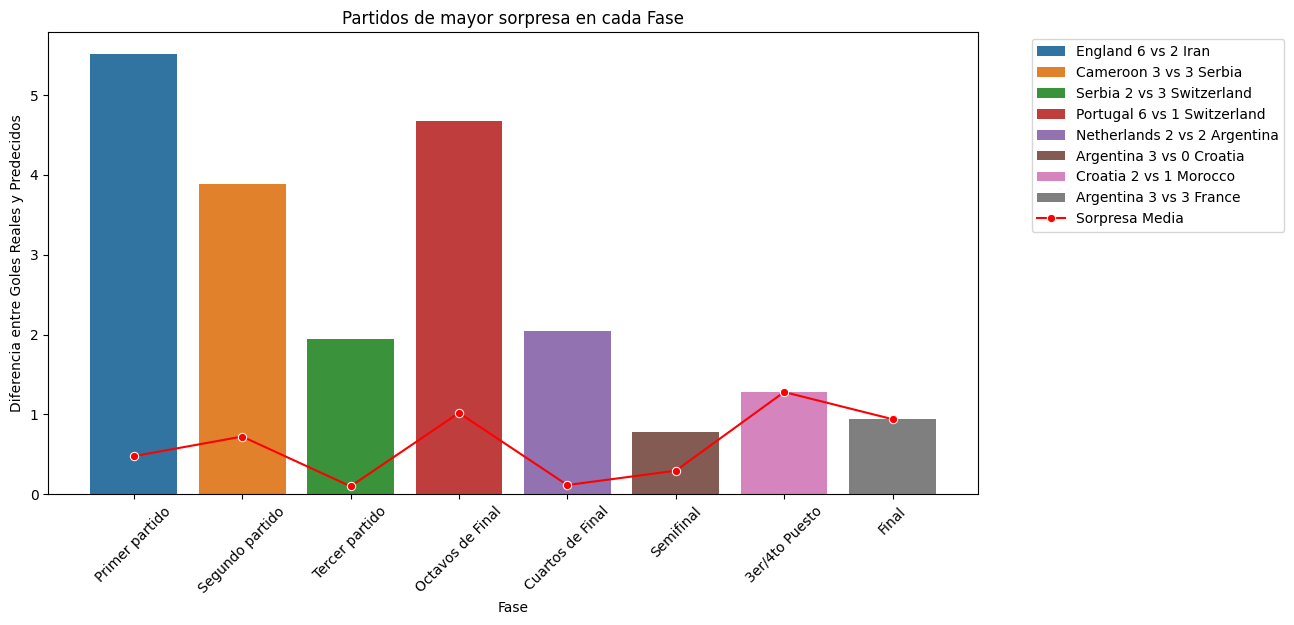

In [18]:
# Ordenamos las fases del Dataframe comparación_sorpresas en el orden cronológico
orden_fases = ['Primer partido', 'Segundo partido', 'Tercer partido', 'Octavos de Final', 'Cuartos de Final', 'Semifinal', '3er/4to Puesto', 'Final']
comparacion_sorpresas['fase'] = pd.Categorical(comparacion_sorpresas['fase'], categories=orden_fases, ordered=True)
comparacion_sorpresas = comparacion_sorpresas.sort_values('fase')

Q1, Q3 = round(sorpresas_df['sorpresa'].quantile(0.25), 1), round(sorpresas_df['sorpresa'].quantile(0.75), 1)
print(f"Inicio del segundo cuartil (25%): {Q1}")
print(f"Fin del tercer cuartil (75%): {Q3}")

# Graficar las sorpresas
plt.figure(figsize=(12, 6))
sns.barplot(data=comparacion_sorpresas, x='fase', y='sorpresa', hue='partido', dodge=False)
sns.lineplot(data=comparacion_sorpresas, x='fase', y='sorpresa_media', color='red', marker='o', label='Sorpresa Media')
plt.title('Partidos de mayor sorpresa en cada Fase'), plt.xlabel('Fase'), plt.ylabel('Diferencia entre Goles Reales y Predecidos'), plt.xticks(rotation=45), plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Grafico de SPI a traves de las fases de selecciones sorpresas


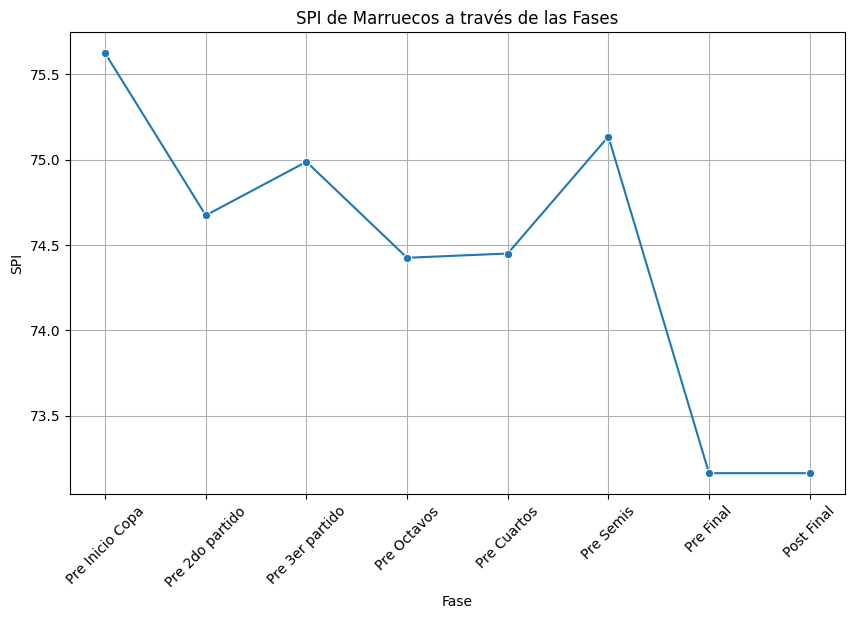

In [20]:
marruecos_data = pronostico[pronostico['Equipo'] == 'Morocco']

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=marruecos_data, x='Fase', y='SPI', marker='o', sort=False)

# Invertir el orden del eje x para que las fases vayan de inicio a final
plt.gca().invert_xaxis()

# Configuración del gráfico
plt.title('SPI de Marruecos a través de las Fases')
plt.xlabel('Fase')
plt.ylabel('SPI')
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.show()


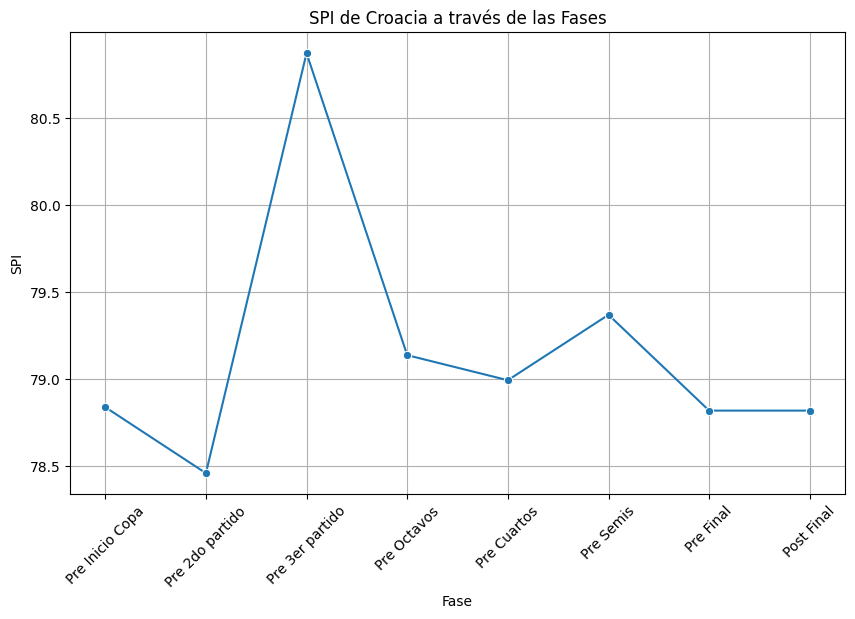

In [21]:
croacia_data = pronostico[pronostico['Equipo'] == 'Croatia']

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=croacia_data, x='Fase', y='SPI', marker='o', sort=False)

# Invertir el orden del eje x para que las fases vayan de inicio a final
plt.gca().invert_xaxis()

# Configuración del gráfico
plt.title('SPI de Croacia a través de las Fases')
plt.xlabel('Fase')
plt.ylabel('SPI')
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.show()

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------